<a href="https://colab.research.google.com/github/Ar1maMSG/TETRIS/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%BC_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%D0%BC_%D0%BF%D0%BE_%D0%BA%D1%80%D0%B8%D0%BF%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%B8_%D0%BD%D0%B0_%D1%8D%D0%BB%D0%BB%D0%B8%D0%BF%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D1%80%D0%B8%D0%B2%D1%8B%D1%85_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Калистратов Арсений Сергеевич 11-312**
**Вариант 5**


**Задача 1**

In [1]:
E = (-1, 1)
P = 751


#Представляет точку на кривой Эдвардса и предоставляет методы для сложения точек и умножения точек на целые числа
class El_p:
    def __init__(self, x=0, y=1) -> None:
        self.x = x
        self.y = y

    def __add__(self, other):
        x1, y1 = self.x, self.y
        x2, y2 = other.x, other.y
        if x1 == x2 and y1 == y2:
            m = ((2*y1) ** (P-2) % P) * (3 * x1**2 + E[0]) % P
        else:
            m = ((x2 - x1) ** (P-2) % P) * (y2 - y1) % P

        new_x = (m ** 2 - self.x - other.x ) % P
        new_y = (m*(self.x - new_x) - self.y) % P

        return El_p(new_x, new_y)

    def __mul__(self, k):
        k_G = self
        for _ in range(k-1):
            k_G = self + k_G
        return k_G


    def __str__(self) -> str:
        return self.__repr__()

    def __repr__(self):
        return str((self.x, self.y))

G = El_p()

P_b = (425, 663) #Открытый ключ

#Уникальные буквы и их координаты и ключ сеанса для каждой буквы
chars = (('у', 247, 485, 6),
        ('в', 229, 151, 14),
        ('е', 234, 587, 5),
        ('р', 243, 87, 7),
        ('о', 240, 309, 12),
        ('в', 229, 151, 11),
        ('а', 228, 271, 4),
        ('т', 247, 266, 9),
        ('ь', 256, 121, 19))

for char in chars:
    print('Для буквы P_m: ', f'"{char[0]}" и ключом {char[-1]}; ', 'Пара C_m будет равна: {', G * char[-1], ', ', El_p(char[1], char[2]) + El_p(*P_b)*char[-1], '}', sep='')

Для буквы P_m: "у" и ключом 6; Пара C_m будет равна: {(725, 195), (620, 680)}
Для буквы P_m: "в" и ключом 14; Пара C_m будет равна: {(596, 433), (39, 171)}
Для буквы P_m: "е" и ключом 5; Пара C_m будет равна: {(425, 663), (654, 102)}
Для буквы P_m: "р" и ключом 7; Пара C_m будет равна: {(135, 82), (85, 716)}
Для буквы P_m: "о" и ключом 12; Пара C_m будет равна: {(286, 136), (99, 295)}
Для буквы P_m: "в" и ключом 11; Пара C_m будет равна: {(179, 275), (526, 412)}
Для буквы P_m: "а" и ключом 4; Пара C_m будет равна: {(16, 416), (458, 490)}
Для буквы P_m: "т" и ключом 9; Пара C_m будет равна: {(489, 468), (140, 115)}
Для буквы P_m: "ь" и ключом 19; Пара C_m будет равна: {(568, 355), (400, 56)}


**Задача 2**

In [9]:

n_b = 41 #Секретный ключ
chars = (
    ((283, 493), (314, 127)),
    ((425, 663), (561, 140)),
    ((568, 355), (75, 433)),
    ((440, 539), (602, 627)),
    ((188, 93), (395, 414)),
    ((179, 275), (25, 604)),
    ((72, 254), (47, 349)),
    ((72, 254), (417, 137)),
    ((188, 93), (298, 225)),
    ((56, 419), (79, 111))
)

for char in chars:
    print('Для C_m {', char[0], ', ', char[1],'}; исходной точкой будет: ', El_p(*char[1]) + El_p(char[0][0], -char[0][1] % P)*(n_b), sep='')

Для C_m {(283, 493), (314, 127)}; исходной точкой будет: (0, 394)
Для C_m {(425, 663), (561, 140)}; исходной точкой будет: (240, 309)
Для C_m {(568, 355), (75, 433)}; исходной точкой будет: (240, 442)
Для C_m {(440, 539), (602, 627)}; исходной точкой будет: (247, 485)
Для C_m {(188, 93), (395, 414)}; исходной точкой будет: (243, 664)
Для C_m {(179, 275), (25, 604)}; исходной точкой будет: (247, 266)
Для C_m {(72, 254), (47, 349)}; исходной точкой будет: (236, 39)
Для C_m {(72, 254), (417, 137)}; исходной точкой будет: (238, 175)
Для C_m {(188, 93), (298, 225)}; исходной точкой будет: (253, 540)
Для C_m {(56, 419), (79, 111)}; исходной точкой будет: (236, 712)


Это соотвествует: "опустимый"

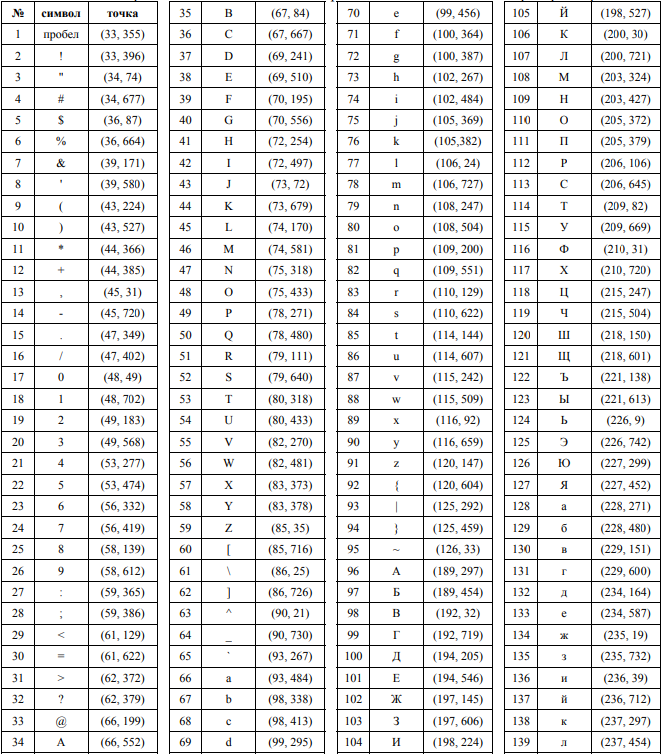

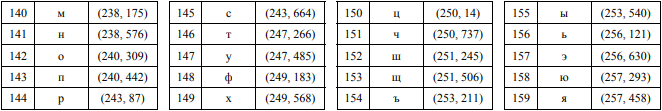